<a href="https://colab.research.google.com/github/kuonumber/crawler/blob/master/Day9_homework_download_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import os
from bs4 import BeautifulSoup
from PIL import Image

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')


In [ ]:
# %cd /gdrive/'My Drive'/'Colab Notebooks'

In [ ]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1598951118.A.D6A.html'

resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

In [ ]:
soup

In [ ]:
output_dir = 'imgs'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag
image_tags = soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
        continue
    img_id = img_tag['href'].split('/')[-1]
    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}'.format(img_id)
    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status()
        # 檢查圖片副檔名
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))

In [ ]:
image_tags[0]['href'].split('/')[-1].split('.')

['pLwTOy2', 'jpg']

In [ ]:
! ls imgs/

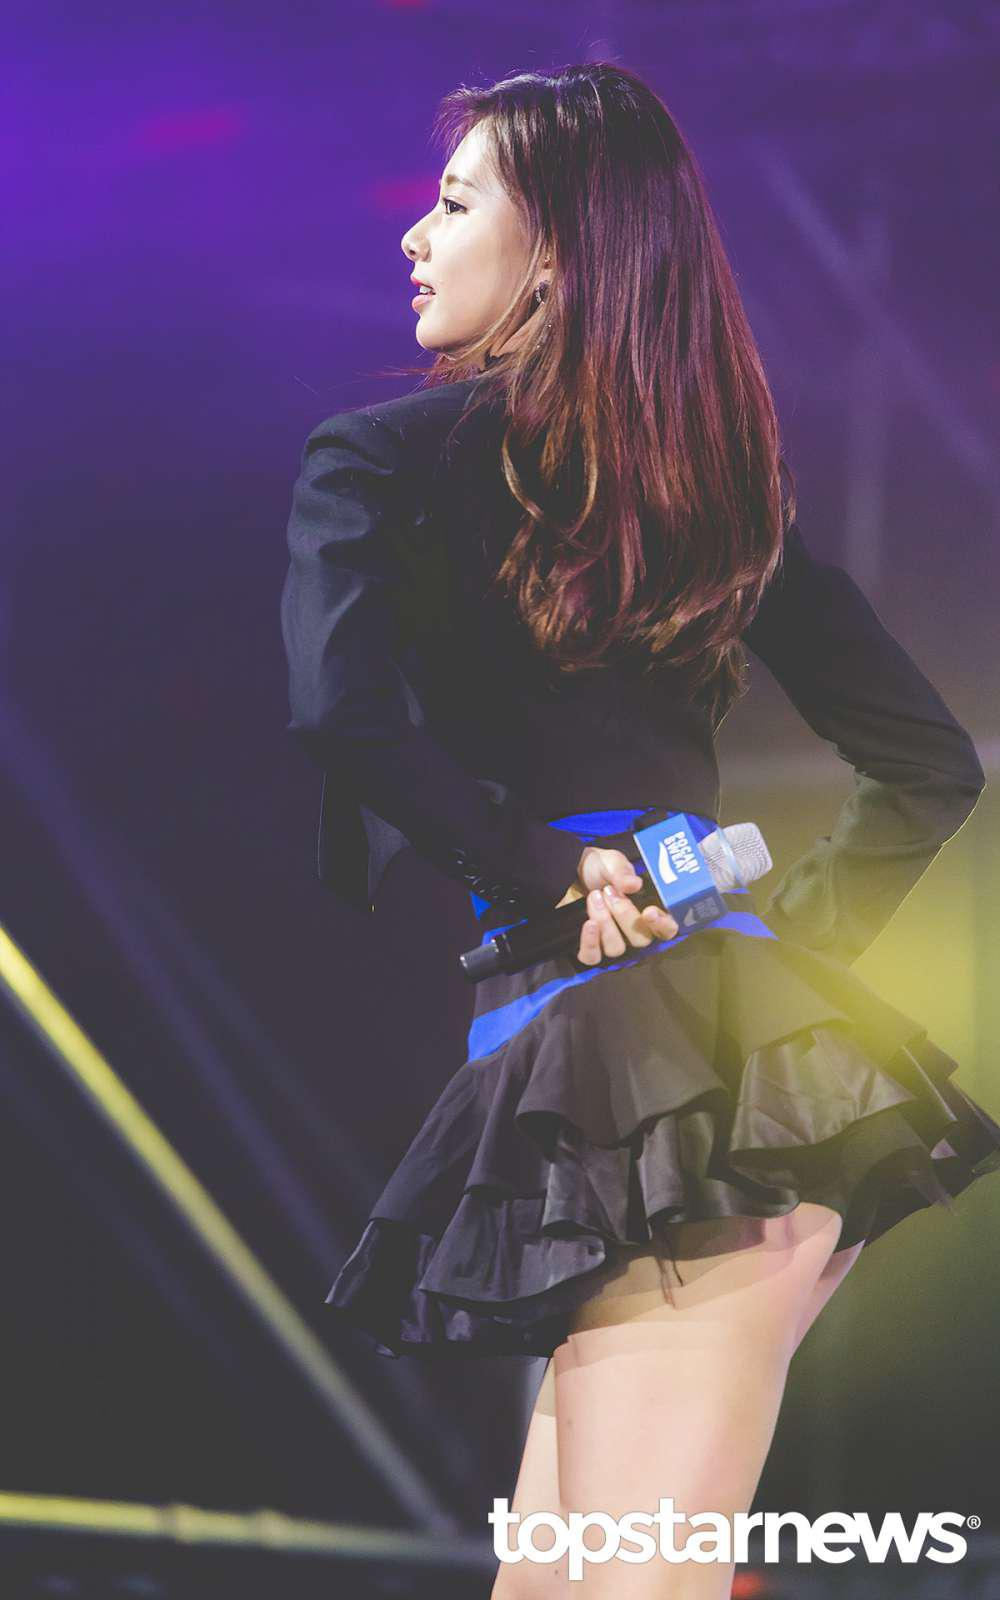

In [ ]:
from IPython.display import Image as im
im(filename='imgs/651d3S0.jpg.jpeg', width=500, height=700) 

In [ ]:
from PIL import Image

resp = requests.get(image_tags[0]['href'], stream=True)

image = Image.open(resp.raw)

print(image.format) # e.g. JPEG

# 假設我們重新組合圖片檔名與副檔名 logo.jpeg 之後

# 可以用 requests 的方式也可以用 PIL 儲存圖片

# image.save('logo.jpeg') 

JPEG


In [ ]:
res = requests.get('https://pycrawler-fileentity.cupoy.com/marathon/dailytask/1586233886792/1594903726870', stream=True)

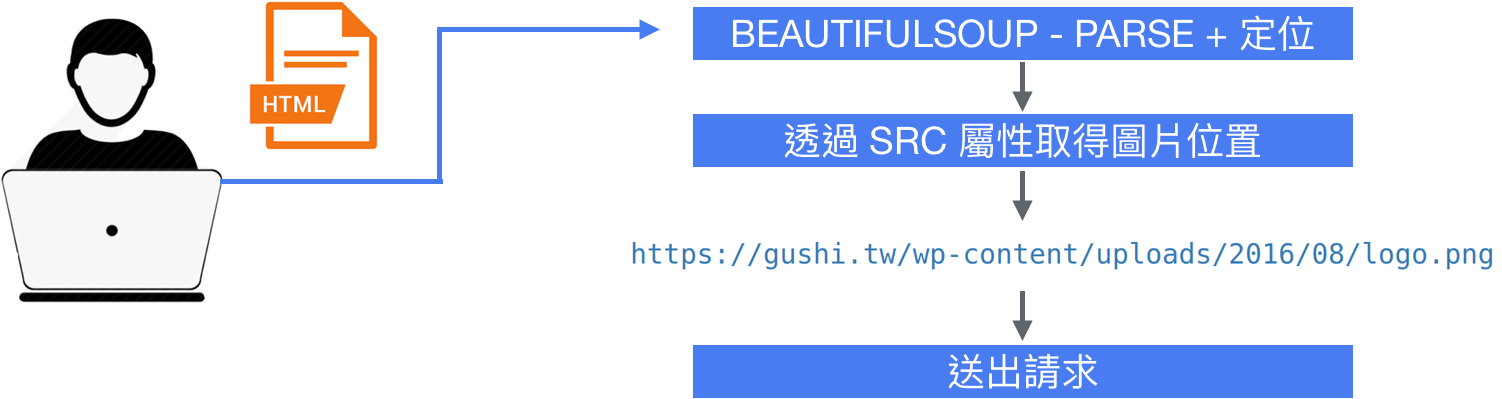

In [ ]:
Image.open(res.raw)